# Generating synthethic data

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install torch
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install ydata-synthetic
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import torch
import itertools
import os
import json
from datetime import datetime
from json import JSONDecodeError
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement ydata-synthetic (from versions: none)
ERROR: No matching distribution found for ydata-synthetic
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.


In [12]:
home_dir = '../datasets'
dataset = 'GNFUV-USV-Dataset'

home_dir = home_dir +"/" + dataset

pi_dirs = os.listdir(home_dir)

data_list = []
base_time = None
columns = None
samples = {}
for pi_dir in pi_dirs:
    aux_list = []
    if 'pi' not in pi_dir:
        continue
    curr_dir = os.path.join(home_dir, pi_dir)
    data_file = os.path.join(curr_dir, os.listdir(curr_dir)[0])
    with open(data_file, 'r') as f:
        line = f.readline().strip().replace("'", '"')
        while line != '':
            try:
                input_json = json.loads(line)
                sensor_datetime = datetime.fromtimestamp(input_json['time'])
                if base_time is None:
                    base_time = datetime(sensor_datetime.year, sensor_datetime.month, sensor_datetime.day, 0, 0, 0, 0)
                input_json['time'] = (sensor_datetime - base_time).seconds
                input_json['pi'] = pi_dir
                aux_list.append(list(input_json.values()))
                data_list.append(list(input_json.values()))
                if columns is None:
                    columns = list(input_json.keys())
                
            except JSONDecodeError as je:
                pass
            line = f.readline().strip().replace("'", '"')
                        
            aux_df = pd.DataFrame(aux_list, columns=columns)
            # Cleanning useless cols
            # del aux_df['experiment']
            # del aux_df['device']
            # del aux_df['time']
            aux_df=aux_df.head(250)
            samples[pi_dir]=(aux_df)        

In [13]:
# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

plt_ind_list = samples['pi6'][['temperature','humidity']].values.tolist()
samples["pi6"]['pi']='pi6'

# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

i = 0
for i in range(5):
#for noise,plt_ind in zip([0,0.1,1,10,100,1000],plt_ind_list): 
    n = dt.make_regression(n_samples=250,
                             n_features=2,
                             random_state=rand_state) 
    
    new_sample=pd.DataFrame(n[0], columns=["temperature","humidity"])
    samples['n'+str(i)] = samples["pi6"].copy()
    samples['n'+str(i)]['pi'] = 'n'+str(i)
    samples['n'+str(i)]['temperature']= new_sample["temperature"] + samples['n'+str(i)]['temperature']
    samples['n'+str(i)]['humidity']= new_sample["humidity"] + samples['n'+str(i)]['humidity']
    i = i + 1
    rand_state = rand_state + i
    
print(samples.keys())
for k in samples.keys():
    print(samples[k].head(5))

dict_keys(['pi6', 'pi2', 'pi5', 'pi4', 'pi3', 'n0', 'n1', 'n2', 'n3', 'n4'])
                             device  humidity  temperature  experiment   time  \
0  gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0  65957   
1  gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0  65971   
2  gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0  65977   
3  gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0  65983   
4  gnfuv-temp-exp1-55d487b85b-5g2xh      22.0         40.0         1.0  65989   

    pi  
0  pi6  
1  pi6  
2  pi6  
3  pi6  
4  pi6  
                             device  humidity  temperature  experiment   time  \
0  gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0  65957   
1  gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0  65971   
2  gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0  65977   
3  gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0

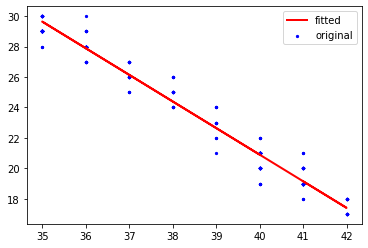

R-squared: 0.9718906150952907
MSE: 0.5080000000004415
                               device  humidity  temperature  experiment  \
0    gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0   
1    gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0   
2    gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0   
3    gnfuv-temp-exp1-55d487b85b-5g2xh      21.0         40.0         1.0   
4    gnfuv-temp-exp1-55d487b85b-5g2xh      22.0         40.0         1.0   
..                                ...       ...          ...         ...   
245  gnfuv-temp-exp1-55d487b85b-5g2xh      18.0         41.0         1.0   
246  gnfuv-temp-exp1-55d487b85b-5g2xh      18.0         41.0         1.0   
247  gnfuv-temp-exp1-55d487b85b-5g2xh      19.0         41.0         1.0   
248  gnfuv-temp-exp1-55d487b85b-5g2xh      19.0         41.0         1.0   
249  gnfuv-temp-exp1-55d487b85b-5g2xh      19.0         41.0         1.0   

      time   pi  isoutlier  
0   

In [28]:
d = samples['pi2']
#print(d.head())
    
# train machine learning algorithm
#training_x = np.array([d['temperature'],d['humidity']])
training_x = d[['temperature']].values.tolist()[:250]
training_y = np.array(d['humidity'])[:250]

#print(training_x)
#print(training_y)

# The kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.
rbf_svr = SVR(kernel='linear')
rbf_svr.fit(training_x,training_y)


pred= rbf_svr.predict(training_x)

plt.scatter(np.array(d['temperature'])[:250], training_y, s=5, color="blue", label="original")
plt.plot(np.array(d['temperature'])[:250], pred, lw=2, color="red", label="fitted")
plt.legend()
plt.show()
#
d['isoutlier'] = np.where(pred == -1 ,-1,1)
#

score = rbf_svr.score(training_x,training_y)
print("R-squared:", score)
print("MSE:", mean_squared_error(training_y, pred))

print (d.where(d['isoutlier']==1))

In [4]:
reg_label = "Inliers coef:%s - b:%0.2f" % \
            (np.array2string(rbf_svr.coef_,
                             formatter={'float_kind': lambda fk: "%.3f" % fk}),
            rbf_svr.intercept_)

In [5]:

def get_inliers(X,y):
    
    #X = d[['temperature']].values.tolist()[:250]
    #y = np.array(d['humidity'])[:250]

    # The kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.
    svr = SVR(kernel='linear')
    svr.fit(X,y)
    return svr.predict(X)


def OCSVM(samples, models, similar_pairs):
    pair_prob = []
    for x,y in similar_pairs:
        sx = samples[x]
        sy = samples[y]
        
        pred_y_inliers = get_inliers(models[x],sy)
        pred_x_inliers = get_inliers(models[y],sx)
        
        x_y_overlap = len((pred_y_inliers)/len(sy))
        y_x_overlap = len((pred_x_inliers)/len(sx))
        
        pair_prob.append((x_y_overlap,y_x_overlap))
    return pair_prob

In [45]:

_samples={}
_models={}
for k in samples.keys():
    print(k)
    _samples[k] = np.array(samples[k]['humidity'])
    _models[k] = samples[k][['temperature']].values.tolist()

similar_pairs=[('pi2', 'n0'), ('pi2', 'n1'), ('pi2', 'n2'), ('pi2', 'n3'), ('pi2', 'n4'), ('n0', 'n1'), ('n0', 'n2'), ('n0', 'n3'), ('n0', 'n4'), ('n1', 'n2'), ('n1', 'n3'), ('n1', 'n4'), ('n2', 'n3'), ('n2', 'n4'), ('n3', 'n4')]

ocsvm = OCSVM(_samples,_models,similar_pairs)
print(ocsvm)
    

pi6
pi2
pi5
pi4
pi3
n0
n1
n2
n3
n4
[(250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250)]
